# Unsupervised Learning

In [77]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import urllib.request 
import PIL
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.datasets import make_blobs, load_digits, make_moons
from sklearn.base import BaseEstimator
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [2]:
NDArrayFloat = NDArray[np.float_]
NDArrayInt = NDArray[np.int_]

In [3]:
blob_centers: NDArrayFloat = np.array([[0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std: NDArrayFloat = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers= blob_centers, cluster_std= blob_std, random_state= 42)

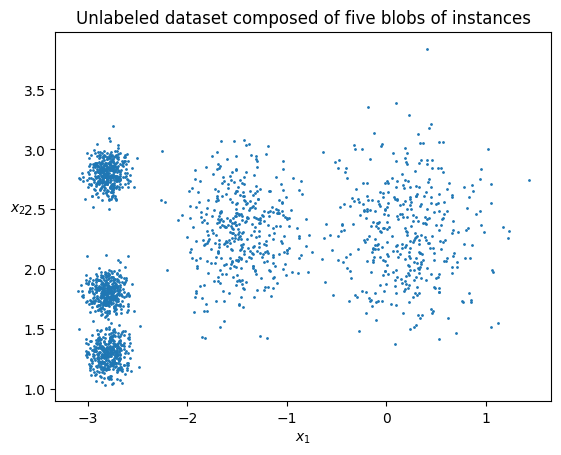

In [4]:
plt.scatter(X[:, 0], X[:, 1], s= 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation= 0)
plt.title('Unlabeled dataset composed of five blobs of instances')
plt.show()

## K-means

In [5]:
kmeans = KMeans(n_clusters= 5, n_init= 10, random_state= 42)
predictions: NDArrayInt = kmeans.fit_predict(X)

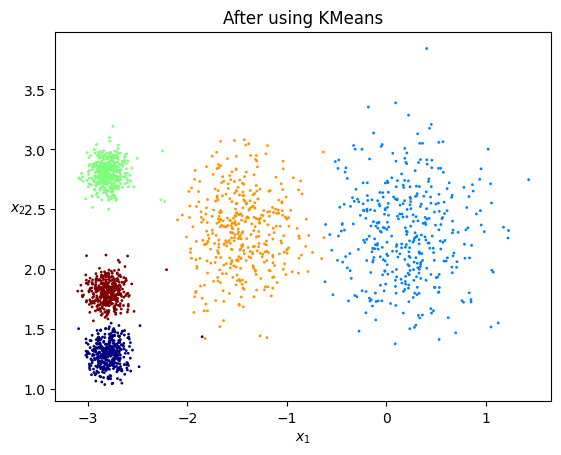

In [6]:
plt.scatter(X[:, 0], X[:, 1], s= 1, c= predictions, cmap= 'jet')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation= 0)
plt.title('After using KMeans')
plt.show()

In [7]:
predictions

array([2, 1, 3, ..., 1, 2, 4], dtype=int32)

In [8]:
predictions is kmeans.labels_

True

In [9]:
kmeans.cluster_centers_

array([[-2.79244799,  1.2973862 ],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-1.4453407 ,  2.32051326],
       [-2.80372723,  1.80873739]])

In [10]:
X_new: NDArrayInt = np.array([[1, 2], [-2, 2], [-3, 3], [-3, 2]])
kmeans.predict(X_new)

array([1, 3, 2, 4], dtype=int32)

In [11]:
def plot_data(X: NDArrayFloat) -> None:
    """
    Plots the given 2D dataset X. 
    """
    plt.scatter(X[:, 0], X[:, 1], c= 'k', s= 1)
    
    
def plot_centroids(
    centroids: NDArrayFloat, 
    *, 
    circle_color: str = 'w', 
    cross_color: str = 'k'
) -> None:
    """
    Plots the centroid coordinates as a circle and a cross in middle.
    
    Parameters:
    - centroids (np.ndarray): Coordinates of centroids.
    - circle_color (str): default 'w' (white).
    - cross_color (str): default 'k' (black).
    """
    plt.scatter(centroids[:, 0], centroids[:, 1], c= circle_color, alpha= 0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], c= cross_color, marker= 'x')
    
    
def plot_decision_boundary(
    clusterer: BaseEstimator, 
    X: NDArrayFloat, 
    *,
    resolution: int = 1000, 
    dataset_plot: bool = True,
    centroids_plot: bool = True,
    title: str | None = None,
    xy_labels: tuple[str, str] = ('$x_1$', '$x_2$')
) -> None:
    """
    Plots the decision boundaries of the given clusterer.
    
    Parameters:
    - clusterer (BaseEstimator): Clusterer object, for example: KMeans().
    - X (np.ndarray): Dataset on which the clusterer is trained.
    - resolution (int): Amount of points to use for decision boundary, i.e it uses these number of instances for predicting the decision boudnary. WARNING using very big resolution would slow the process. Default 1000.
    - dataset_plot (bool): Flag to plot dataset, default True.
    - centroids_plot (bool): Flag to plot centroids, default True.
    - title (str): Title of the plot, default None.
    - xy_labels (tuple[str, str]): x and y axis labels.
        
    Returns:
    - None
    """
    mins: NDArrayFloat = X.min(axis= 0) - 0.1 
    maxs: NDArrayFloat = X.max(axis= 0) + 0.1
    
    x1, x2 = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution)
    )
    
    X_new: NDArrayFloat = np.c_[x1.ravel(), x2.ravel()]
    y_pred: NDArrayFloat = clusterer.predict(X_new).reshape(x1.shape)
        
    plt.contourf(
        x1, x2, y_pred, 
        extent= (mins[0], maxs[0], mins[1], maxs[1]),
        alpha= 0.3,
        cmap= 'turbo'
    )
    plt.contour(x1, x2, y_pred, colors= 'k')
    
    if dataset_plot:
        plot_data(X)
        
    if centroids_plot:
        plot_centroids(clusterer.cluster_centers_)
        
    if title is not None:
        plt.title(title)
        
    plt.xlabel(xy_labels[0])
    plt.ylabel(xy_labels[1], rotation= 0)    

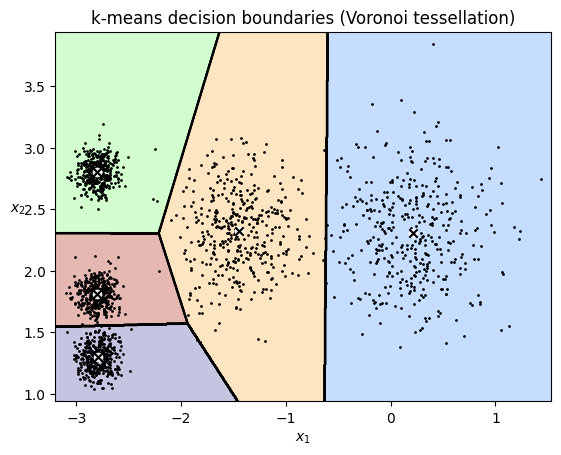

In [12]:
plot_decision_boundary(kmeans, X, title= 'k-means decision boundaries (Voronoi tessellation)')

In [13]:
kmeans.transform(X_new).round(2)

array([[3.86, 0.85, 3.88, 2.47, 3.81],
       [1.06, 2.23, 1.13, 0.64, 0.83],
       [1.72, 3.28, 0.28, 1.7 , 1.21],
       [0.73, 3.22, 0.83, 1.59, 0.27]])

In [14]:
np.linalg.norm(np.tile(X_new, (1, 5)).reshape(-1, 5, 2) - kmeans.cluster_centers_, axis= 2).round(2)

array([[3.86, 0.85, 3.88, 2.47, 3.81],
       [1.06, 2.23, 1.13, 0.64, 0.83],
       [1.72, 3.28, 0.28, 1.7 , 1.21],
       [0.73, 3.22, 0.83, 1.59, 0.27]])

In [15]:
np.tile(X_new, (1, 5)).reshape(-1, 5, 2)

array([[[ 1,  2],
        [ 1,  2],
        [ 1,  2],
        [ 1,  2],
        [ 1,  2]],

       [[-2,  2],
        [-2,  2],
        [-2,  2],
        [-2,  2],
        [-2,  2]],

       [[-3,  3],
        [-3,  3],
        [-3,  3],
        [-3,  3],
        [-3,  3]],

       [[-3,  2],
        [-3,  2],
        [-3,  2],
        [-3,  2],
        [-3,  2]]])

### Working of k-means

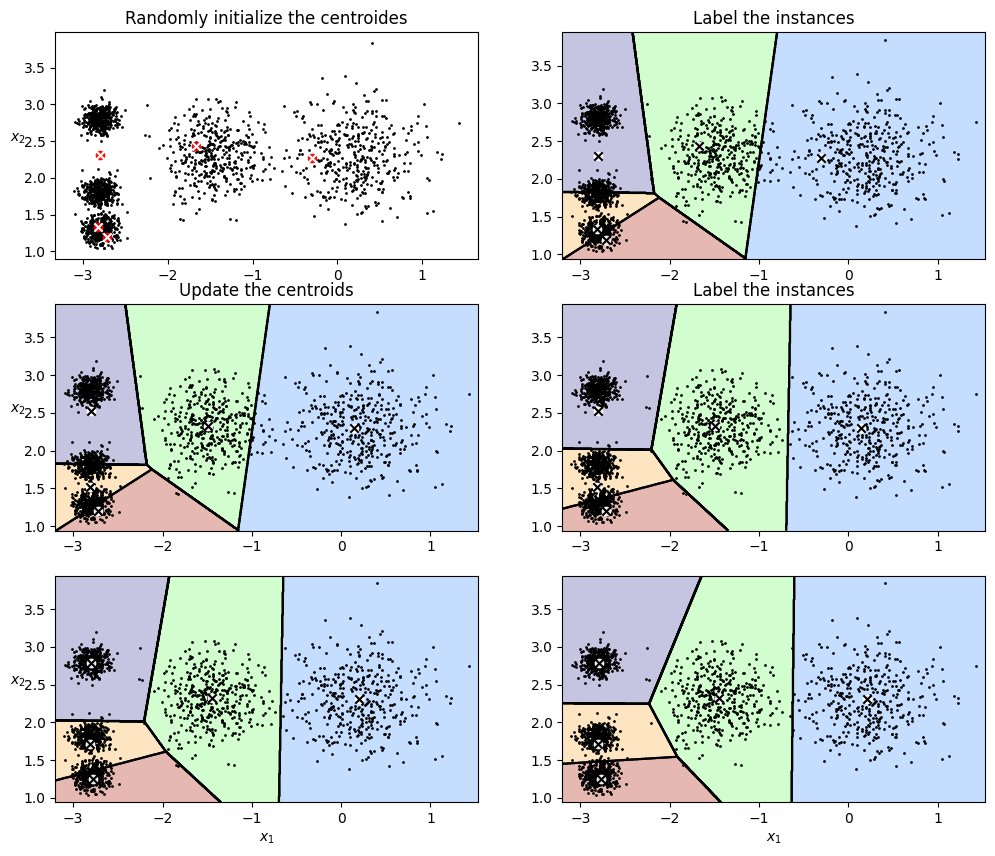

In [16]:
# k-means per iteration
kmeans_iter1 = KMeans(n_clusters= 5, init= 'random', n_init= 1, max_iter= 1, random_state= 7)
kmeans_iter2 = KMeans(n_clusters= 5, init= 'random', n_init= 1, max_iter= 2, random_state= 7)
kmeans_iter3 = KMeans(n_clusters= 5, init= 'random', n_init= 1, max_iter= 3, random_state= 7)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


plt.figure(figsize= (12, 10))

# first step
plt.subplot(321)
plt.title('Randomly initialize the centroides')
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color= 'r', cross_color= 'w')
plt.ylabel('$x_2$', rotation= 0)

plt.subplot(322)
plot_decision_boundary(kmeans_iter1, X, title= 'Label the instances', xy_labels= ('', ''))

# second step
plt.subplot(323)
plot_decision_boundary(kmeans_iter1, X, centroids_plot= False, title= 'Update the centroids', xy_labels= ('', '$x_2$'))
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundary(kmeans_iter2, X, title= 'Label the instances', xy_labels= ('', ''))

# third step
plt.subplot(325)
plot_decision_boundary(kmeans_iter2, X, centroids_plot= False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundary(kmeans_iter3, X, xy_labels= ('$x_1$', ''))

We have to repeat these steps until the centroids don't move. Although in just 3 iterations, we almost made it similar to the previous model. 

### Variability of k-means

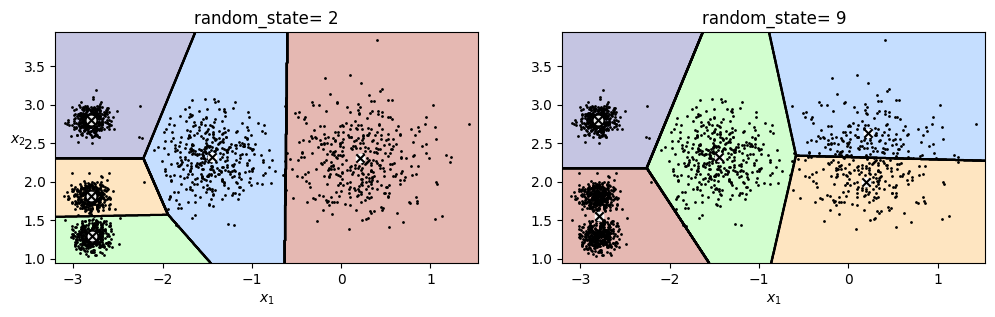

In [17]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

plt.figure(figsize= (12, 3))

plt.subplot(121)
plot_decision_boundary(kmeans_rnd_init1, X, title= 'random_state= 2')

plt.subplot(122)
plot_decision_boundary(kmeans_rnd_init2, X, title= 'random_state= 9', xy_labels= ('$x_1$', ''))

### Centroid Initialization Methods

In [18]:
good_init: NDArrayInt = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

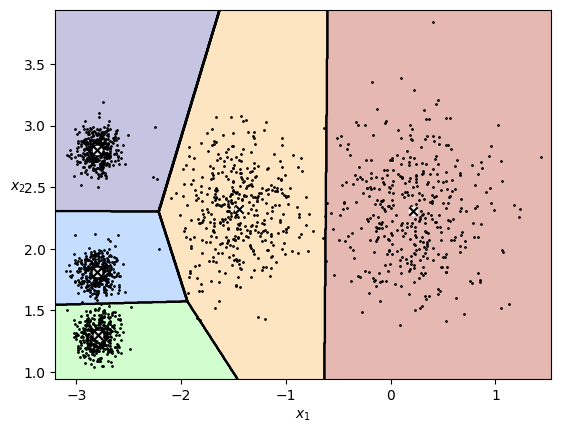

In [19]:
plot_decision_boundary(kmeans, X)

In [20]:
kmeans.inertia_

213.4217713125891

In [21]:
kmeans.score(X, y)

-213.4217713125891

- If we give an array to init, it tries all those values and return the best model with lowest inertia. 
- For `init = 'random'` the array part is done randomly. 
- For `init = 'k-means++'` it uses an optimized algorithm which is less likely to converge to suboptimal solution.

### Mini-batch k-means

In [22]:
mini_batch_kmeans = MiniBatchKMeans(n_clusters= 5, n_init= 3, random_state= 42)
mini_batch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

### Finding the optimal number of clusteres

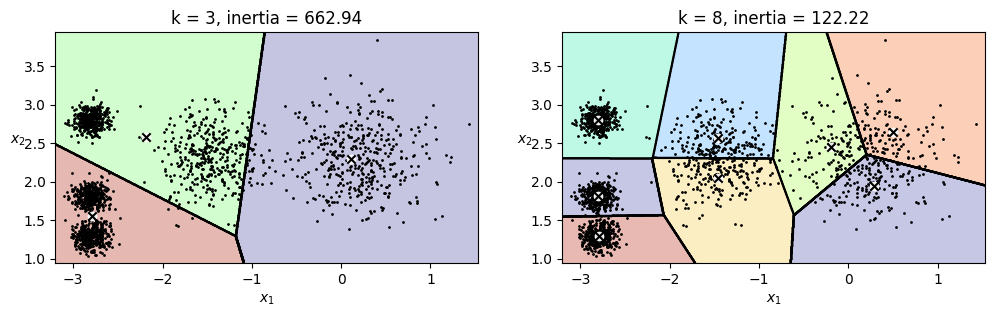

In [23]:
kmeans_3 = KMeans(n_clusters= 3, n_init= 10, random_state= 42)
kmeans_8 = KMeans(n_clusters= 8, n_init= 10, random_state= 42)

kmeans_3.fit(X)
kmeans_8.fit(X)

plt.figure(figsize= (12, 3))

plt.subplot(121)
plot_decision_boundary(kmeans_3, X, title= f'k = 3, inertia = {kmeans_3.inertia_:.2f}')

plt.subplot(122)
plot_decision_boundary(kmeans_8, X, title= f'k = 8, inertia = {kmeans_8.inertia_:.2f}')

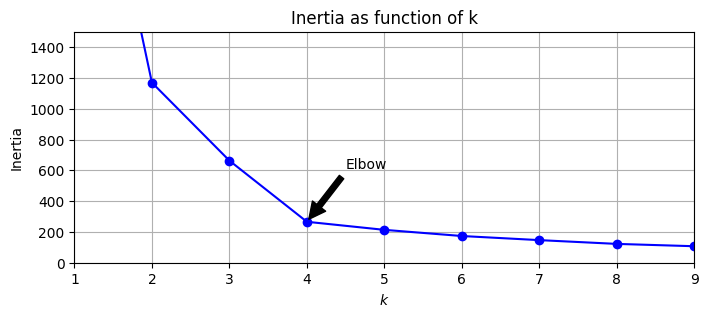

In [24]:
kmeans_per_k: list[KMeans] = [
    KMeans(n_clusters= k, n_init= 10, random_state= 42).fit(X) 
    for k in range(1, 10)
]
inertias: list[float] = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize= (8, 3))

plt.plot(range(1, 10), inertias, 'b-', marker= 'o')
plt.annotate(
    text= 'Elbow', 
    xy= (4, inertias[3]), 
    xytext= (4.5, 610),
    arrowprops= {
        'facecolor': 'black',
        'shrink': 0.05
    }
)

plt.grid()
plt.axis([1, 9, 0, 1500])
plt.title('Inertia as function of k')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.show()

This means 4 is the best value for k, but using inertia is not the best approach. So we use silhouette score.

In [25]:
silhouette_score(X, kmeans.labels_)

0.656578194104489

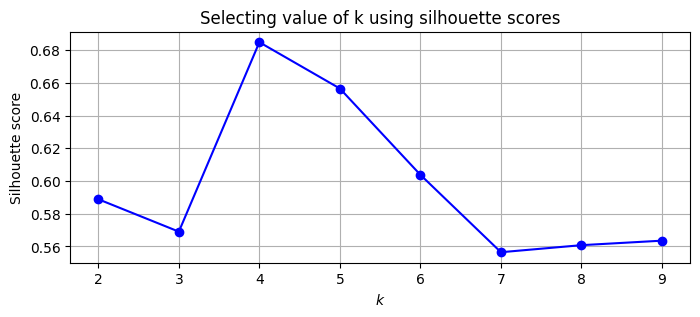

In [26]:
kmeans_per_k: list[KMeans] = [
    KMeans(n_clusters= k, n_init= 10, random_state= 42).fit(X) 
    for k in range(2, 10)
]
silhouette_scores: list[float] = [silhouette_score(X, model.labels_) for model in kmeans_per_k]
    
plt.figure(figsize= (8, 3))

plt.plot(range(2, 10), silhouette_scores, 'b-', marker= 'o')

plt.grid()
plt.title('Selecting value of k using silhouette scores')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

k = 4 seems really good, but 5 is not bad.

## Using Clustering for Image Segmentation

In [27]:
img_url: str = r'https://raw.githubusercontent.com/ageron/handson-ml3/main/images/unsupervised_learning/ladybug.png'
urllib.request.urlretrieve(img_url, 'lady_bug.png')

image: NDArrayInt = np.array(PIL.Image.open('lady_bug.png'))
image.shape

(533, 800, 3)

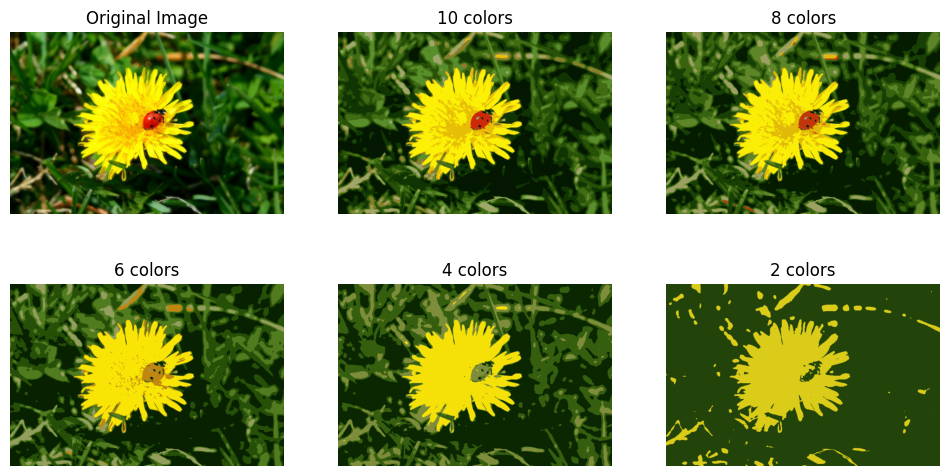

In [28]:
def plot_image(img: np.ndarray, title: str) -> None:
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

# reshaping to get long list of RGB
X = image.reshape(-1, 3)

plt.figure(figsize= (12, 6))
plt.subplot(231)
plot_image(image, 'Original Image')

for k, subplot in zip(range(10, 1, -2), range(232, 237)):
    kmeans = KMeans(n_clusters= k, n_init= 10, random_state= 42)
    kmeans.fit(X)
    # advance np indexing, getting the color of centroid according to label
    segmented_img: NDArrayFloat = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    # normalizing
    segmented_img = segmented_img / 255
    
    plt.subplot(subplot)
    plot_image(segmented_img, f'{k} colors')

## Using Clustering for Semi-Supervised Learning

In [29]:
X_digits, y_digits = load_digits(return_X_y= True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [30]:
n_labeled: int = 50

logistic_reg = LogisticRegression(max_iter= 10_000)
logistic_reg.fit(X_train[:50], y_train[:50])

LogisticRegression(max_iter=10000)

In [31]:
logistic_reg.score(X_test, y_test)

0.7481108312342569

In [32]:
k: int = 50

kmeans = KMeans(n_clusters= k, n_init= 10, random_state= 42)
X_digit_dist: NDArrayFloat = kmeans.fit_transform(X_train)

In [33]:
representative_digits_index: NDArrayFloat = X_digit_dist.argmin(axis= 0)   # these are the representatives of their clusters
X_representative_digits: NDArrayFloat = X_train[representative_digits_index]
y_representative_digits: NDArrayFloat = y_train[representative_digits_index]    # well this was supposed to be done manually

In [34]:
log_reg = LogisticRegression(max_iter= 10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

### Label Propagation

In [35]:
y_train_propagated: NDArrayInt = np.empty(y_train.shape[0], dtype= np.int64)
    
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [36]:
log_reg = LogisticRegression(max_iter= 10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8942065491183879

## DBSCAN

In [37]:
X, y = make_moons(n_samples= 1000, noise= 0.05, random_state= 42)

In [38]:
dbscan = DBSCAN(eps= 0.05)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [39]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

The `-1` means those are anomalies.

In [40]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [41]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [42]:
def plot_dbscan(
    dbscan: DBSCAN, 
    X: NDArrayFloat, 
    *,
    size: int,
    show_xlabel: bool = True, 
    show_ylabel: bool = True,
    show_legend: bool = True
) -> None:
    anomaly_labels: NDArray[np.bool_] = (dbscan.labels_ == -1)
    X_anomalies: NDArrayFloat = X[anomaly_labels]
    X_without_anomalies: NDArrayFloat  = X[~anomaly_labels]
    labels: NDArrayInt = dbscan.labels_[~anomaly_labels]
       
    plt.scatter(
        X_without_anomalies[:, 0], 
        X_without_anomalies[:, 1], 
        s= size, 
        c= labels, 
        cmap= 'Pastel2', 
        marker= 'o'
    )
    plt.scatter(
        X_without_anomalies[:, 0], 
        X_without_anomalies[:, 1], 
        c= labels, 
        cmap= 'turbo', 
        marker= '.'
    )
    plt.scatter(
        X_anomalies[:, 0], 
        X_anomalies[:, 1], 
        c= 'k', 
        marker= 'x', 
        label= 'Anomalies'
    )
    
    plt.title(f'eps= {dbscan.eps}, min_samples= {dbscan.min_samples}')
    
    if show_legend:
        plt.legend()
        
    if show_xlabel:
        plt.xlabel('$x_1$')
        
    if show_ylabel:
        plt.ylabel('$x_2$', rotation= 0)

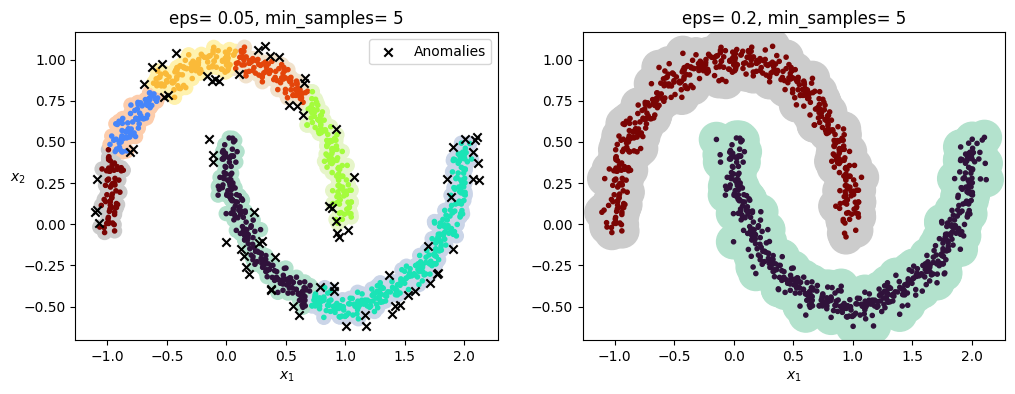

In [43]:
plt.figure(figsize= (12, 4))

plt.subplot(121)
plot_dbscan(dbscan, X, size= 100)

plt.subplot(122)
dbscan = DBSCAN(eps= 0.20)
dbscan.fit(X)

plot_dbscan(dbscan, X, size= 600, show_ylabel= False, show_legend= False)

In [44]:
knn = KNeighborsClassifier(n_neighbors= 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [45]:
X_new: NDArrayFloat = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [46]:
knn.predict(X_new)

array([1, 0, 1, 0])

In [47]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

## Gaussian Mixture Models

In [48]:
X1, y1 = make_blobs(n_samples= 1000, centers= ((4, -4), (0, 0)), random_state= 42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples= 250, centers= 1, random_state= 42)
X2 = X2 + [6, -8]
X: NDArrayFloat = np.r_[X1, X2]
y: NDArrayFloat = np.r_[y1, y2]

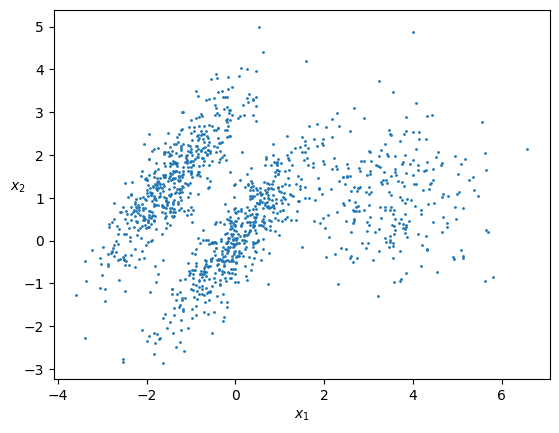

In [49]:
plt.scatter(X[:, 0], X[:, 1], s= 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation= 0)
plt.show()

In [50]:
gmm = GaussianMixture(n_components= 3, n_init= 10, random_state= 42)
gmm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [51]:
gmm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [52]:
gmm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [53]:
gmm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [54]:
gmm.converged_

True

In [55]:
gmm.n_iter_

4

In [56]:
gmm.predict(X)    # hard clustering

array([0, 0, 1, ..., 2, 2, 2])

In [57]:
gmm.predict_proba(X).round(3)    # soft clustering

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

In [58]:
X_new, y_new = gmm.sample(6)

In [59]:
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [60]:
y_new

array([0, 0, 1, 2, 2, 2])

In [61]:
gmm.score_samples(X).round(2)    # log of PDF

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

In [62]:
def plot_gaussian_mixture(
    clusterer: GaussianMixture, 
    X: NDArrayFloat, 
    *,
    resolution: int = 1000, 
    show_xlabel: bool = True, 
    show_ylabel: bool = True
) -> None:
    mins: NDArrayFloat = X.min(axis= 0) - 0.1
    maxs: NDArrayFloat = X.max(axis= 0) + 0.1
        
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], num= resolution),
        np.linspace(mins[1], maxs[1], num= resolution)
    )
    
    X_new: NDArrayFloat = np.c_[xx.ravel(), yy.ravel()]
    Z: NDArrayFloat = -clusterer.score_samples(X_new).reshape(xx.shape)
        
    plt.contourf(
        xx, yy, Z,
        norm= LogNorm(vmin=1.0, vmax=30.0),
        levels= np.logspace(0, 2, 12)
    )
    
    plt.contour(
        xx, yy, Z,
        norm= LogNorm(vmin=1.0, vmax=30.0),
        levels= np.logspace(0, 2, 12),
        linewidths= 1, 
        colors='k'
    )
    
    Z = clusterer.predict(X_new).reshape(xx.shape)
    plt.contour(xx, yy, Z, colors= 'r')
    
    plt.scatter(X[:, 0], X[:, 1], c= 'k', s= 1)
    
    centroids: NDArrayFloat = clusterer.means_
    plt.scatter(centroids[:, 0], centroids[:, 1], c= 'w', alpha= 0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], c= 'k', marker= 'x')
    
    if show_xlabel:
        plt.xlabel('$x_1$')
        
    if show_ylabel:
        plt.ylabel('$x_2$', rotation= 0)

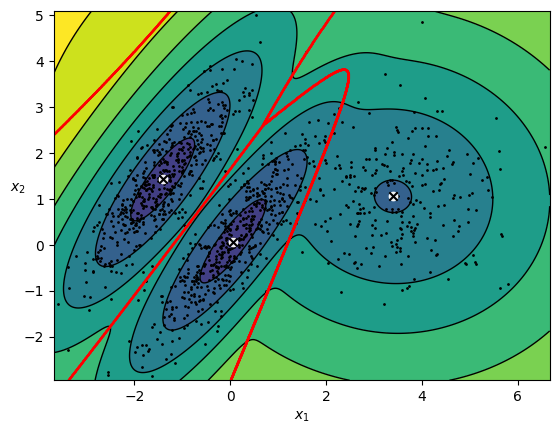

In [63]:
plot_gaussian_mixture(gmm, X)

In [64]:
gmm_full = GaussianMixture(n_components= 3, n_init= 10, covariance_type= 'full',random_state= 42)    # default
gmm_full.fit(X)
gmm_spherical = GaussianMixture(n_components= 3, n_init= 10, covariance_type= 'spherical',random_state= 42)
gmm_spherical.fit(X)
gmm_diag = GaussianMixture(n_components= 3, n_init= 10, covariance_type= 'diag',random_state= 42)
gmm_diag.fit(X)
gmm_tied = GaussianMixture(n_components= 3, n_init= 10, covariance_type= 'tied',random_state= 42)
gmm_tied.fit(X)

GaussianMixture(covariance_type='tied', n_components=3, n_init=10,
                random_state=42)

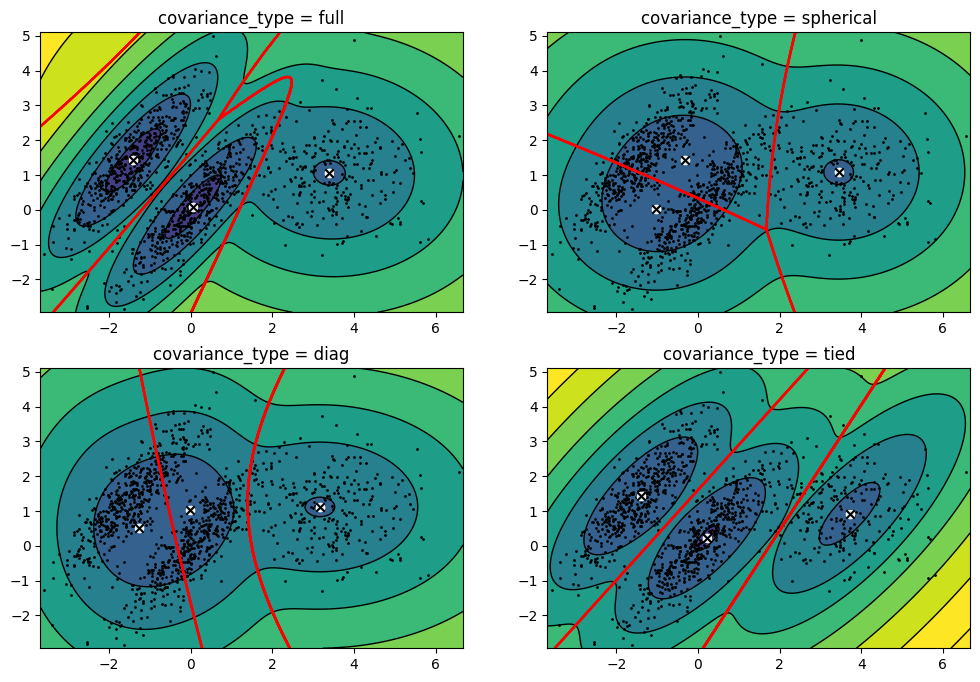

In [65]:
plt.figure(figsize= (12, 8))

c_types: list[str] = ['full', 'spherical', 'diag', 'tied']
models: list[GaussianMixture] = [gmm_full, gmm_spherical, gmm_diag, gmm_tied]

for c_type, model, subplot in zip(c_types, models, range(221, 225)):
    plt.subplot(subplot)
    plt.title(f'covariance_type = {c_type}')
    plot_gaussian_mixture(model, X, show_xlabel= False, show_ylabel= False)
    
plt.show()

## Using Gaussian Mixture for Anomaly Detection

In [66]:
densities: NDArrayFloat = gmm.score_samples(X)
density_threshold: float = np.percentile(densities, 2)
anomalies: NDArrayFloat = X[densities < density_threshold]

In [67]:
anomalies[:5]

array([[ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.74680316, -0.78385111],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124]])

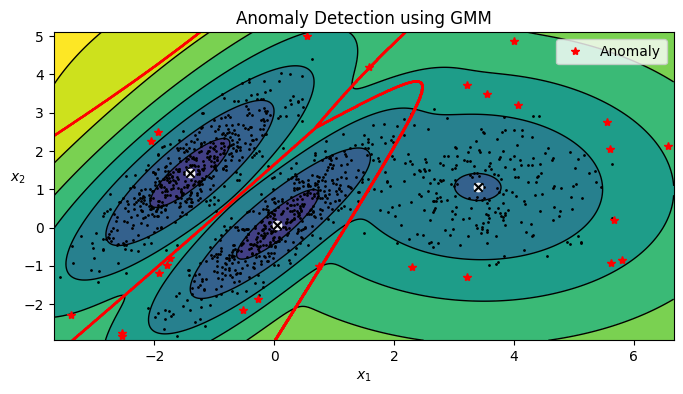

In [68]:
plt.figure(figsize= (8, 4))
plot_gaussian_mixture(gmm, X)
plt.title('Anomaly Detection using GMM')

plt.plot(anomalies[:, 0], anomalies[:, 1], 'r*', label= 'Anomaly')
plt.legend()
plt.show()

### Selecting number of clusteres

In [70]:
gmm.bic(X)

8189.747000497186

In [71]:
gmm.aic(X)

8102.521720382148

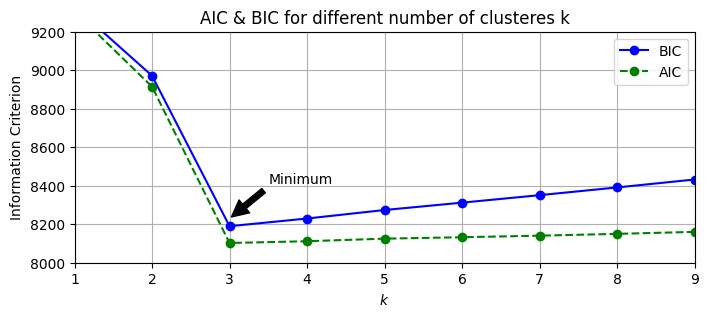

In [76]:
gmm_per_k: list[GaussianMixture] = [
    GaussianMixture(n_components= k, n_init= 10, random_state= 42).fit(X) 
    for k in range(1, 10)
]
bics: list[float] = [model.bic(X) for model in gmm_per_k]
aics: list[float] = [model.aic(X) for model in gmm_per_k]
    
plt.figure(figsize= (8, 3))

plt.plot(range(1, 10), bics, 'b-', marker= 'o', label= 'BIC')
plt.plot(range(1, 10), aics, 'g--', marker= 'o', label= 'AIC')

plt.annotate(
    text= 'Minimum', 
    xy= (3, bics[3]), 
    xytext= (3.5, 8410),
    arrowprops= {
        'facecolor': 'black',
        'shrink': 0.05
    }
)

plt.grid()
plt.axis([1, 9, 8000, 9200])
plt.title('AIC & BIC for different number of clusteres k')
plt.xlabel('$k$')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()

## Bayesian Gaussian Mixture

In [79]:
bgm = BayesianGaussianMixture(n_components= 10, n_init= 10, random_state= 42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [80]:
X, y = make_moons(n_samples= 1000, noise= 0.05, random_state= 42)

In [81]:
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

Text(0.5, 1.0, 'Does not work well for non elipsoidal shapes')

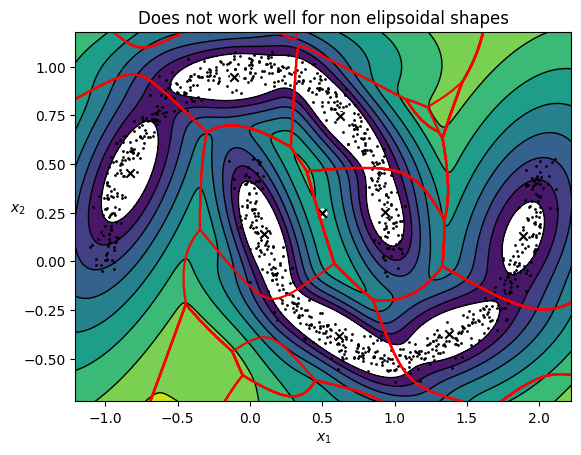

In [83]:
plot_gaussian_mixture(bgm, X)
plt.title('Does not work well for non elipsoidal shapes')